# Worksheet 12

Name:  Bargav Jagatha

UID: U80005052 

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.

4. Predicting the number of births occuring in a specified minute.

are both NOT examples of classification while,


1. Predicting whether a student will be offered a job after graduating given their GPA.

3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.

ARE example of classification


b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

To both learn a model and get an idea of how it might perform on unseen data, you can follow these general steps:

### Data Preparation:

1. **Data Cleaning**: Remove or impute missing values, outliers, and handle noisy data.
2. **Feature Engineering**: Extract or select the most relevant features from your dataset.

### Data Splitting:

3. **Training-Validation-Test Split**: Divide your dataset into three parts:
   - **Training Set**: Used to train the model.
   - **Validation Set**: Used to fine-tune model parameters and select the best-performing model.
   - **Test Set**: Used to evaluate the model's performance on unseen data.

A typical ratio might be 70% for training, 15% for validation, and 15% for testing.

### Model Building:

4. **Select Algorithm**: Choose an appropriate machine learning algorithm for your problem.
5. **Train Model**: Use the training set to train your model.

### Model Evaluation:

6. **Hyperparameter Tuning**: Use the validation set to tune hyperparameters. This could involve techniques like grid search or random search.
7. **Cross-Validation**: Optionally, you can use k-fold cross-validation for a more robust measure of model performance.
8. **Model Selection**: Based on validation performance, choose the best model.

### Final Evaluation:

9. **Test the Model**: Use the test set to get an unbiased estimate of the model's performance on unseen data. Metrics could include accuracy, F1-score, or other relevant metrics depending on the problem.
10. **Confidence Intervals**: Optionally, you can compute confidence intervals for your performance metrics to get an idea of the uncertainty in your estimates.

### Deployment:

11. **Deploy the Model**: Once satisfied with the model's performance, you can deploy it to a production environment.

By following this approach, you'll not only train a model but also get a reasonably good estimate of how it's likely to perform on data it has never seen before.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

### Underfitting:

**Explanation**: Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. As a result, the model performs poorly on both the training and test sets.

**Signs to Look Out For**:
- **Low Training Accuracy**: If the model performs poorly on the training set, it's a strong sign of underfitting.
- **Low Test Accuracy**: Poor performance on the test set is also an indicator, although this could be due to other issues as well.
- **Simplistic Model**: If you're using a very simple model for a complex problem, you're prone to underfitting.
- **Visual Inspection**: Plots showing the model's predictions vs. actual data will often reveal that the model is failing to capture the true relationship.

### Overfitting:

**Explanation**: Overfitting happens when a machine learning model is too complex and starts learning the noise in the data rather than the actual pattern. The model will perform well on the training set but poorly on unseen or test data.

**Signs to Look Out For**:
- **High Training Accuracy but Low Test Accuracy**: A model that performs exceptionally well on the training data but poorly on the test data is likely overfitting.
- **Complex Model**: Using an overly complex model for a simple problem can lead to overfitting.
- **Visual Inspection**: Plots might show that the model fits even the noise in the training set, suggesting it's too flexible and therefore overfitting.
- **Lack of Generalization**: If your model performs significantly worse on new data or a validation set compared to the training set, it's likely overfitting.

Both underfitting and overfitting can be addressed through various techniques like adding complexity to the model, simplifying the model, using more data, or employing regularization methods.

### K Nearest Neighbors

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

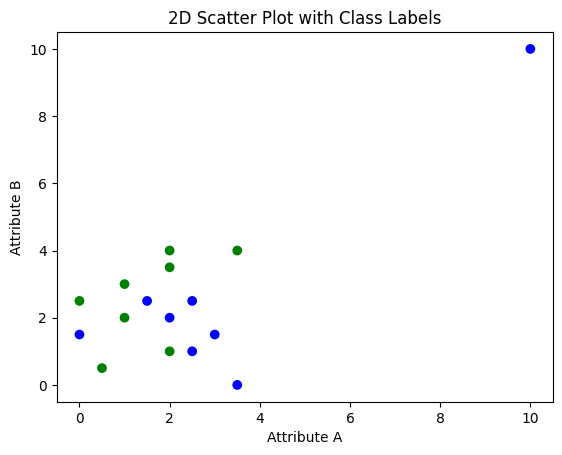

In [8]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]].tolist())

plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter Plot with Class Labels")

plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [9]:
filtered_data = {
    "Attribute A": [x for i, x in enumerate(data["Attribute A"]) if (x, data["Attribute B"][i]) != (10, 10)],
    "Attribute B": [x for i, x in enumerate(data["Attribute B"]) if (data["Attribute A"][i], x) != (10, 10)],
    "Class": [x for i, x in enumerate(data["Class"]) if (data["Attribute A"][i], data["Attribute B"][i]) != (10, 10)],
}


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

defining noise can be subjective and need a deeper understanding of the dataset. for this problem I dont think there are any

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

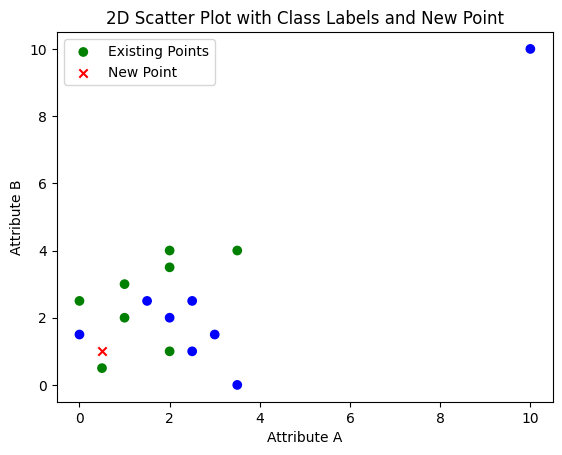

In [10]:
import matplotlib.pyplot as plt
import numpy as np



plt.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]].tolist(), label='Existing Points')

new_point = (0.5, 1)
plt.scatter(new_point[0], new_point[1], c='r', marker='x', label='New Point')

plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.title("2D Scatter Plot with Class Labels and New Point")
plt.legend()

plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

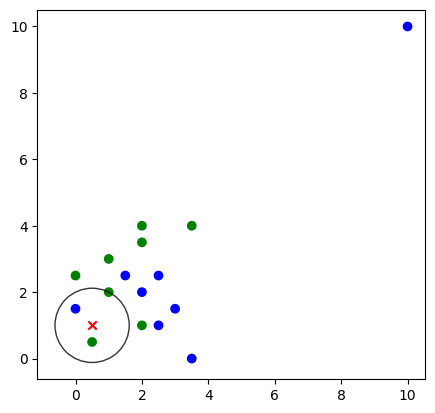

In [11]:

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def n_closest_to(example, n, data):
    distances = []
    for i in range(len(data["Attribute A"])):
        point = (data["Attribute A"][i], data["Attribute B"][i])
        dist = euclidean_distance(example, point)
        distances.append((dist, point))
        
    distances.sort(key=lambda x: x[0])
    return distances[:n]

location = (0.5, 1)

closest_points = n_closest_to(location, 3, data)

radius = closest_points[-1][0]
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], c=colors[data["Class"]].tolist())
axes.scatter(location[0], location[1], c='r', marker='x')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') 
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [12]:
def majority_class(closest_points, data):
    class_counts = {}
    for dist, point in closest_points:
        idx = data["Attribute A"].index(point[0])
        point_class = data["Class"][idx]
        
        if point_class in class_counts:
            class_counts[point_class] += 1
        else:
            class_counts[point_class] = 1
            
    return max(class_counts.items(), key=lambda x: x[1], default=(0, 0))[0]


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [14]:
count = 0
for i in range(len(data["Attribute A"])):
    example = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]
    
    training_set = {
        "Attribute A": [x for j, x in enumerate(data["Attribute A"]) if j != i],
        "Attribute B": [x for j, x in enumerate(data["Attribute B"]) if j != i],
        "Class": [x for j, x in enumerate(data["Class"]) if j != i],
    }
    
    closest_points = n_closest_to(example, 3, training_set)
    prediction = majority_class(closest_points, training_set)
    
    if prediction == actual_class:
        count += 1

overall_accuracy = count / len(data["Attribute A"])
print(f"Overall accuracy = {overall_accuracy:.2f}")

Overall accuracy = 0.56
